In [52]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sys.path.append('..')
from src.load_data import read_tables
import src.preprocess_data as p

In [9]:
df = read_tables("../data")
df

,30.00,40.00,50.00,h,35.00,45.00,55.00,25.00,20.50,25.50,30.50,35.50,35.5,24.0,28.0,31.0,34.50,39.0
0,22.75,31.85,38.30,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.90,31.50,38.20,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.75,31.30,38.45,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.75,31.40,38.55,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.65,31.40,38.45,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.55,21.10,24.00,25.90,28.65
91,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.65,21.25,24.95,25.75,28.85
92,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.50,21.20,24.85,26.00,28.95
93,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.55,21.35,24.10,25.65,28.85


In [12]:
tidy_df, X, y = p.preprocess(df)
tidy_df

,h,H,R
734,15.1,20.5,14.15
733,15.1,20.5,14.15
732,15.1,20.5,13.95
731,15.1,20.5,14.25
730,15.1,20.5,14.05
...,...,...,...
501,17.8,55.0,39.60
500,17.8,55.0,39.45
499,17.8,55.0,39.40
498,17.8,55.0,39.85


In [13]:
X_scaled, y_scaled = p.fit_scale_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

### Build the model

In [60]:
model = keras.Sequential([
    Dense(units=4, input_shape=(2,), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])

optimizer = keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [61]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
10/10 - 1s - 78ms/step - loss: 0.5520 - mae: 0.6044 - mse: 0.5520
Epoch 2/50
10/10 - 0s - 3ms/step - loss: 0.4524 - mae: 0.5384 - mse: 0.4524
Epoch 3/50
10/10 - 0s - 4ms/step - loss: 0.3840 - mae: 0.4889 - mse: 0.3840
Epoch 4/50
10/10 - 0s - 4ms/step - loss: 0.3226 - mae: 0.4419 - mse: 0.3226
Epoch 5/50
10/10 - 0s - 4ms/step - loss: 0.2670 - mae: 0.3998 - mse: 0.2670
Epoch 6/50
10/10 - 0s - 3ms/step - loss: 0.2183 - mae: 0.3597 - mse: 0.2183
Epoch 7/50
10/10 - 0s - 4ms/step - loss: 0.1751 - mae: 0.3215 - mse: 0.1751
Epoch 8/50
10/10 - 0s - 3ms/step - loss: 0.1398 - mae: 0.2925 - mse: 0.1398
Epoch 9/50
10/10 - 0s - 4ms/step - loss: 0.1111 - mae: 0.2679 - mse: 0.1111
Epoch 10/50
10/10 - 0s - 4ms/step - loss: 0.0891 - mae: 0.2429 - mse: 0.0891
Epoch 11/50
10/10 - 0s - 3ms/step - loss: 0.0720 - mae: 0.2176 - mse: 0.0720
Epoch 12/50
10/10 - 0s - 3ms/step - loss: 0.0601 - mae: 0.1967 - mse: 0.0601
Epoch 13/50
10/10 - 0s - 4ms/step - loss: 0.0513 - mae: 0.1781 - mse: 0.0513
Epoch 1

KeyError: 'val_mse'

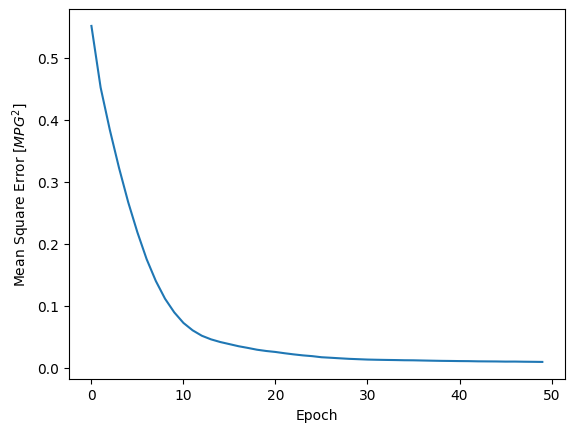

In [63]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [64]:
y_pred_test = model.predict(X_test)
y_pred = model.predict(X_scaled)

y_test_rescale = p.inverse_transform_target(y_test)
y_pred_test_rescale = p.inverse_transform_target(y_pred_test)
y_pred_rescale = p.inverse_transform_target(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [65]:
root_mean_squared_error(y_test_rescale, y_pred_test_rescale), r2_score(y_test_rescale, y_pred_test_rescale)

(np.float64(0.6250987416713039), 0.9926134676807499)

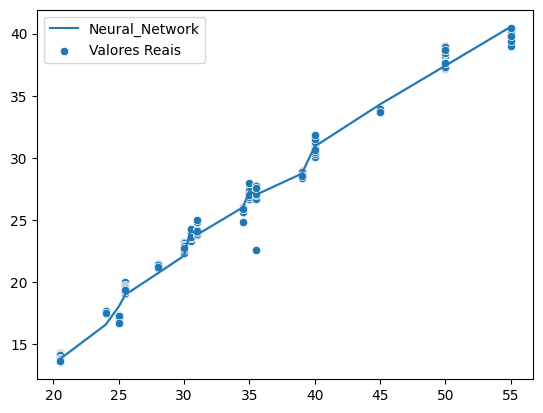

In [67]:
sns.lineplot(x=tidy_df.H.values, y=y_pred_rescale.reshape(-1,), label="Neural_Network")
sns.scatterplot(x=tidy_df.H.values, y=y, label="Valores Reais")

plt.show()